In [1]:
import numpy as np
import pandas as pd
import os
%matplotlib notebook
import matplotlib.pyplot as plt
import sys
import copy

In [2]:
%load_ext autoreload
%autoreload 2

sys.path.append( r"c:\Users\emeraldgeomodelling\Software\ga-aem-win10exe\python" )
from gaaem_utils import *

In [3]:
data_dir=r"c:\Users\emeraldgeomodelling\Software\ga-aem-win10exe\examples\bhmar-skytem\galeisbstdem\output_nompi_parallel"
data_prefix="inversion.output"
data_suffix=".asc"
file_list=[]
for root, dirs, files in os.walk(data_dir):
        for file in files:
            if file.endswith(data_suffix) and file.startswith(data_prefix):
                file_list.append(os.path.join(root, file))
                #data_dic[file]=read_GAAEM_data(os.path.join(root, file))

In [4]:
len(file_list)

4

In [5]:
def read_GALEI_data(file_list):
    alldata={}
    for file in file_list:
        data=read_GAAEM_data(file)
        if len(alldata.keys())==0:
            alldata=data
        else:
            alldata["flightlines"]=pd.concat([alldata["flightlines"], data["flightlines"]], axis=0)
            for key in data["layer_data"].keys():
                if key in alldata["layer_data"].keys():
                    alldata["layer_data"][key] = pd.concat([alldata["layer_data"][key], data["layer_data"][key]], axis=0)
                else:
                    print("something is wrong")
                    print("cannot find key: {0} in file: {1}".format(key,file))

    df=copy.deepcopy(alldata["flightlines"]) 
    layer_data_columns={}
    for key in alldata["layer_data"].keys():
        df=pd.concat([df, alldata["layer_data"][key]], axis=1)
        layer_data_columns[key]=alldata["layer_data"][key].columns

    df.sort_values("uniqueid", inplace=True)
    df.reset_index(inplace=True, drop=True)

    layer_data={}
    for key in layer_data_columns.keys():
        layer_data[key]=pd.concat([df.pop(x) for x in layer_data_columns[key]], axis=1)
        #clear_column_name(layer_data[key])

    data_out={"flightlines":df,
          "layer_data":layer_data
         }
    return data_out

In [6]:
model=read_GALEI_data(file_list)

<IPython.core.display.Javascript object>


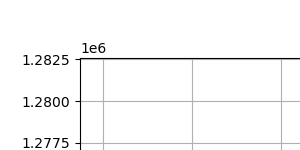

In [7]:
fig, ax = plt.subplots()
ax.plot(model["flightlines"].index, model["flightlines"].fiducial, ".-")
ax.grid()

In [8]:
make_XYZ_model(model)

In [9]:
calc_lineOffset(model)

<IPython.core.display.Javascript object>


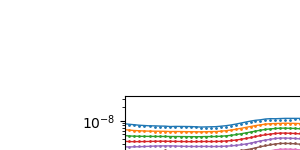

c:\Users\emeraldgeomodelling\Software\ga-aem-win10exe\python\gaaem_utils\__init__.py:64: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  pm=ax.pcolormesh(local_x, depth, image_data, cmap=cmap, shading='auto', vmin=clim[0], vmax=clim[1] )


(30000.0, 31500.0)

In [10]:
fig, ax = plt.subplots(3,1,figsize=(10,8), sharex=True)
ax[0].plot(model["flightlines"].lineoffset, 
          model["layer_data"]["observed_EMSystem_1_ZS"].abs(),
          ".", ms=2,
          label="observed_EMSystem_1_ZS")
ax[0].set_prop_cycle(None)
ax[0].plot(model["flightlines"].lineoffset, 
          model["layer_data"]["predicted_EMSystem_1_ZS"].abs(),
          "-", lw=1,
          label="predicted_EMSystem_1_ZS")
ax[0].set_yscale("log")
ax[0].set_title("data LM")

ax[1].plot(model["flightlines"].lineoffset, 
          model["layer_data"]["observed_EMSystem_2_ZS"].abs(),
           ".", ms=2,
          label="observed_EMSystem_2_ZS")
ax[1].set_prop_cycle(None)
ax[1].plot(model["flightlines"].lineoffset, 
          model["layer_data"]["predicted_EMSystem_2_ZS"].abs(),
           "-", lw=1,
          label="predicted_EMSystem_2_ZS")
ax[1].set_yscale("log")
ax[1].set_title("data HM")

plot_model_section(model, ax=ax[2], keyx="lineoffset", hideBelowDOI=False, cb_orientation="horizontal", clim=[0, 3.5])
ax[1].set_title("inverted model")

ax[0].set_xlim([30000, 31500])

<IPython.core.display.Javascript object>


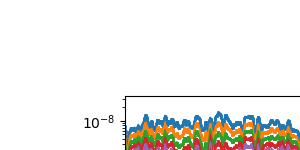

Text(0.5, 1.0, 'inverted model')

In [11]:
fig, ax = plt.subplots(3,1,figsize=(10,8), sharex=True)
ax[0].plot(model["flightlines"].lineoffset, 
          model["layer_data"]["observed_EMSystem_1_ZS"].abs(),
          ".", ms=2,
          label="observed_EMSystem_1_ZS")
ax[0].set_prop_cycle(None)
ax[0].plot(model["flightlines"].lineoffset, 
          model["layer_data"]["predicted_EMSystem_1_ZS"].abs(),
          "-", lw=1,
          label="predicted_EMSystem_1_ZS")
ax[0].set_yscale("log")
ax[0].set_title("data LM")

ax[1].plot(model["flightlines"].lineoffset, 
          model["layer_data"]["observed_EMSystem_2_ZS"].abs(),
           ".", ms=2,
          label="observed_EMSystem_2_ZS")
ax[1].set_prop_cycle(None)
ax[1].plot(model["flightlines"].lineoffset, 
          model["layer_data"]["predicted_EMSystem_2_ZS"].abs(),
           "-", lw=1,
          label="predicted_EMSystem_2_ZS")
ax[1].set_yscale("log")
ax[1].set_title("data HM")

plot_model_section(model, ax=ax[2], keyx="lineoffset", hideBelowDOI=False, cb_orientation="horizontal", clim=[0, 3.5])
ax[1].set_title("inverted model")

In [12]:
model["flightlines"].shape

(5042, 35)

In [13]:
model["layer_data"]["conductivity"].shape

(5042, 30)